In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class VicsekModel:
    def __init__(self, num_particles=49, box_size=10.0, speed=0.1, eta=1.0, radius=1.0, time_steps=100):
        self.num_particles = num_particles
        self.box_size = box_size
        self.speed = speed
        self.eta = eta
        self.radius = radius
        self.time_steps = time_steps
        self.positions = np.random.rand(self.num_particles, 2) * self.box_size
        self.directions = np.random.rand(self.num_particles) * 2 * np.pi

    def update(self):
        for _ in range(self.time_steps):
            new_directions = np.zeros(self.num_particles)
            for i in range(self.num_particles):
                neighbors = []
                for j in range(self.num_particles):
                    if i != j and np.linalg.norm(self.positions[i] - self.positions[j]) < self.radius:
                        neighbors.append(self.directions[j])
                if neighbors:
                    avg_direction = np.arctan2(np.mean(np.sin(neighbors)), np.mean(np.cos(neighbors)))
                    new_directions[i] = avg_direction + np.random.uniform(-self.eta/2, self.eta/2)
                else:
                    new_directions[i] = self.directions[i]

            self.directions = new_directions
            self.positions[:, 0] += self.speed * np.cos(self.directions)
            self.positions[:, 1] += self.speed * np.sin(self.directions)
            self.positions = np.mod(self.positions, self.box_size)

    def plot(self):
        plt.figure(figsize=(8, 8))
        plt.quiver(self.positions[:, 0], self.positions[:, 1], np.cos(self.directions), np.sin(self.directions), 
                   angles='xy', scale_units='xy', scale=1)
        plt.xlim(0, self.box_size)
        plt.ylim(0, self.box_size)
        plt.title("Vicsek Model")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

In [7]:
# Create a Vicsek model instance
vicsek = VicsekModel()

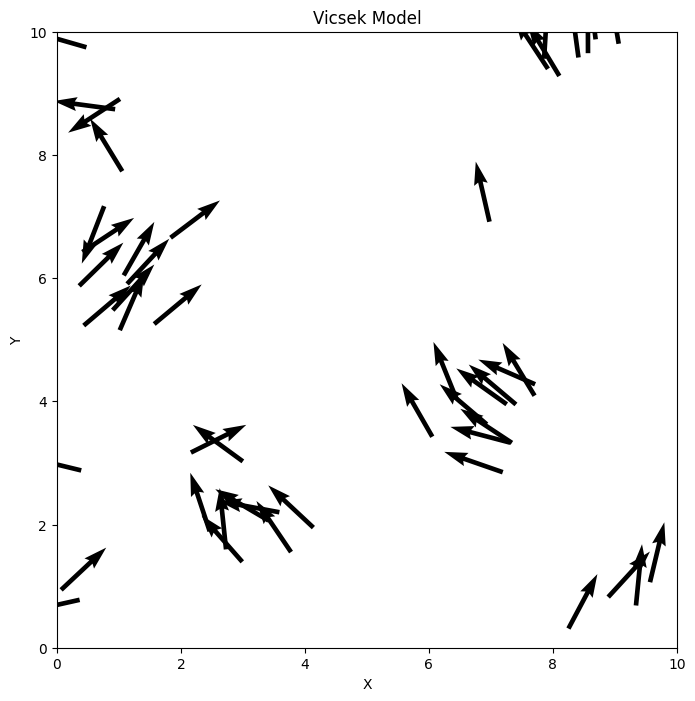

In [8]:
# Run the model
vicsek.update()

# Plot the results
vicsek.plot()

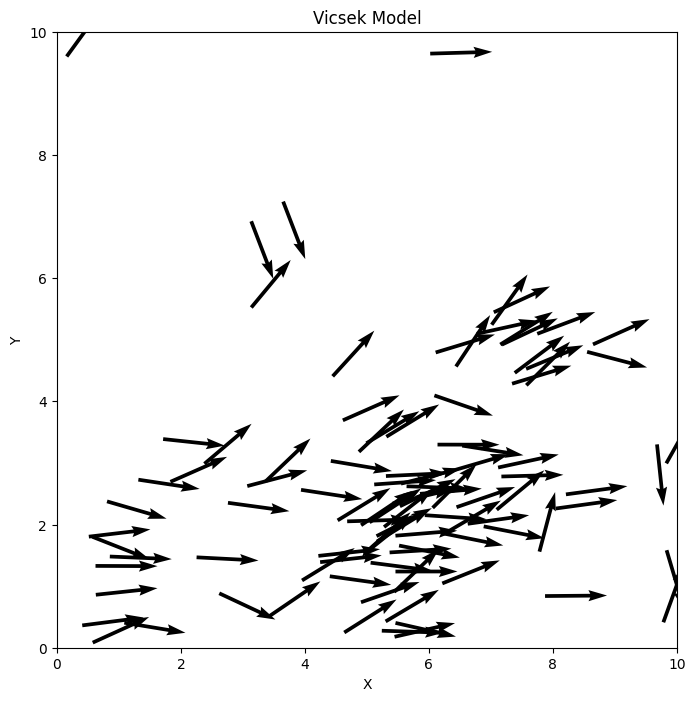